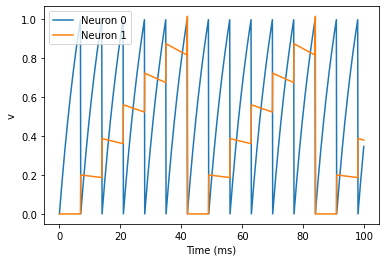

In [19]:
# https://brian2.readthedocs.io/en/stable/resources/tutorials/2-intro-to-brian-synapses.html
# Simple synapse
from brian2 import *
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(2, eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [2, 0] # Neuron 0 to have spikes on its own but neuron 1 none
G.tau = [10, 100]*ms # Neuron 0 to have 10 times as many spikes as neuron 1


# Comment the following 2 lines (no synapse) to verify neuron 1 has no spikes on its own
S = Synapses(G, on_pre='v_post += 0.2') # Neuron 1 potential to increase by 0.2 on each spike from neuron 0
S.connect(i=0, j=1) # Synapse from neuron 0 to 1

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend()

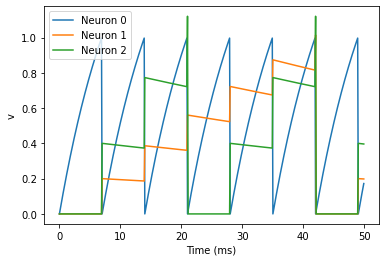

In [20]:
# Synapse weight
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(3., eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [2, 0, 0] # Neuron 0 to have spikes on its own but neuron 1 and 2 none
G.tau = [10, 100, 100]*ms # Neuron 0 to have 10 times as many spikes as neuron 1 and 2


# Comment the following 2 lines (no synapse) to verify neuron 1 and 2 have no spikes on their own
S = Synapses(G, model='w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2]) # Synapse from neuron 0 to 1 and 2
S.w = 'j*0.2' # Neuron 1 and 2 potentials to increase by 0.2 and 0.4 on each spike from neuron 0

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend()

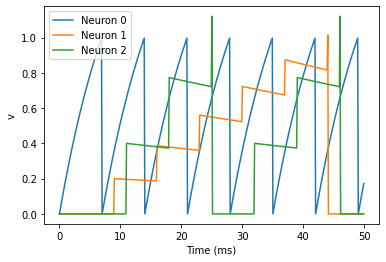

In [21]:
# Synapse delay
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''

G = NeuronGroup(3., eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [2, 0, 0] # Neuron 0 to have spikes on its own but neuron 1 and 2 none
G.tau = [10, 100, 100]*ms # Neuron 0 to have 10 times as many spikes as neuron 1 and 2


# Comment the following 2 lines (no synapse) to verify neuron 1 and 2 have no spikes on their own
S = Synapses(G, model='w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2]) # Synapse from neuron 0 to 1 and 2
S.w = 'j*0.2' # Neuron 1 and 2 potentials to increase by 0.2 and 0.4 on each spike from neuron 0
S.delay = 'j*2*ms' # Delay of 0.2 for synapse from neuron 0 to 1, and 0.4 from 0 to 2

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend()